In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("all_templates.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.663961,0.134357,0.008482,0.262747,0.641173,0.842804,0.856767,0.767401,0.679959,0.643634,...,1.160208,1.15035,1.163577,1.190779,1.229004,1.275958,1.368129,1.533259,1.765569,1
1,0.543092,0.109414,0.000674,0.158396,0.410050,0.602032,0.676846,0.669207,0.636215,0.613130,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.730292,0.160300,0.010513,0.294161,0.734156,0.957460,0.964833,0.861992,0.761617,0.710253,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.733953,0.127992,0.014262,0.304794,0.700978,0.929399,0.936752,0.835087,0.736981,0.695902,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.576229,0.060297,0.018283,0.281264,0.578159,0.740488,0.734252,0.648952,0.583084,0.559620,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [2]:
target = data[data.shape[1]-1]
data = data.drop([data.shape[1]-1],axis=1)
target.shape

(20,)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 7) # (w, h)
plt.rcParams.update({'font.size': 10})

classifiers = {
    'Gaussian Naive Bayes' : GaussianNB(),
    'Multinomial Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(n_estimators = 30, n_jobs=-1), 
    'Decision Tree' : DecisionTreeClassifier(random_state=241),
    'Ada Boost' : AdaBoostClassifier()
}

k_split = 4

kf = KFold(n_splits=k_split, shuffle=True, random_state=42)

X = np.array(data)
y = np.array(target)
res = np.zeros((len(classifiers),k_split))
roc = np.zeros((len(classifiers),k_split))
tprs = []
aucs = []
original = []
predicted = []

for i in range(len(classifiers)):
    tprs.append([])
    aucs.append([])
    original.append(np.array([]))
    predicted.append(np.array([]))

mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        for idx, (name, classifier) in enumerate(classifiers.items()):
            print("Определение показателей для {}".format(name))
            model = classifier.fit(X_train, y_train)
            pred = model.predict(X_test)
            probas_ = model.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_test, probas_[:, probas_.shape[1]-1])
            roc[idx] = roc_auc_score(y_test, probas_[:, probas_.shape[1]-1])
            tprs[idx].append(np.interp(mean_fpr, fpr, tpr))
            tprs[idx][-1][0] = 0.0
            aucs[idx].append(auc(fpr, tpr))
            original[idx] = np.hstack([original[idx], y_test])
            predicted[idx] = np.hstack([predicted[idx], pred])
            res[idx] = cross_val_score(model, X, y, cv=k_split, scoring = "accuracy")
            

Определение показателей для Gaussian Naive Bayes
Определение показателей для Multinomial Naive Bayes
Определение показателей для Logistic Regression
Определение показателей для Random Forest
Определение показателей для Decision Tree
Определение показателей для Ada Boost
Определение показателей для Gaussian Naive Bayes
Определение показателей для Multinomial Naive Bayes
Определение показателей для Logistic Regression
Определение показателей для Random Forest
Определение показателей для Decision Tree
Определение показателей для Ada Boost
Определение показателей для Gaussian Naive Bayes
Определение показателей для Multinomial Naive Bayes
Определение показателей для Logistic Regression
Определение показателей для Random Forest
Определение показателей для Decision Tree
Определение показателей для Ada Boost
Определение показателей для Gaussian Naive Bayes
Определение показателей для Multinomial Naive Bayes
Определение показателей для Logistic Regression
Определение показателей для Random For

In [4]:
for idx, (name, classifier) in enumerate(classifiers.items()):
    print(format(name),np.mean(res[i]))

Gaussian Naive Bayes 0.75
Multinomial Naive Bayes 0.75
Logistic Regression 0.75
Random Forest 0.75
Decision Tree 0.75
Ada Boost 0.75


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

for idx, (name, classifier) in enumerate(classifiers.items()):
    report = classification_report(original[idx],predicted[idx] )
    print(name)
    print(report)
    print_confusion_matrix(original[idx], predicted[idx])

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        14
         1.0       0.50      0.17      0.25         6

    accuracy                           0.70        20
   macro avg       0.61      0.55      0.53        20
weighted avg       0.66      0.70      0.64        20

True positive =  13
False positive =  1
False negative =  5
True negative =  1
Multinomial Naive Bayes
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        14
         1.0       0.57      0.67      0.62         6

    accuracy                           0.75        20
   macro avg       0.71      0.73      0.72        20
weighted avg       0.76      0.75      0.75        20

True positive =  11
False positive =  3
False negative =  2
True negative =  4
Logistic Regression
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0  

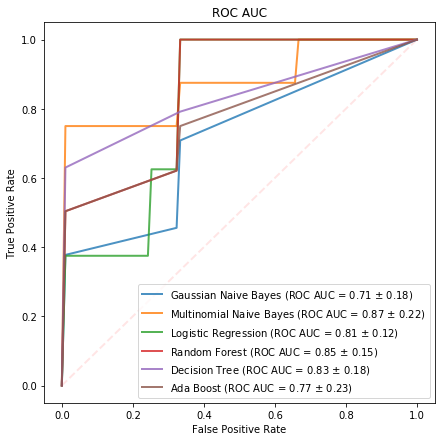

In [6]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.1)

for idx, (name, classifier) in enumerate(classifiers.items()):
    mean_tpr = np.mean(tprs[idx], axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs[idx])
    plt.plot(mean_fpr, mean_tpr, label=r'%s (ROC AUC = %0.2f $\pm$ %0.2f)' % (name, mean_auc, std_auc), lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC AUC")
plt.show()

In [7]:
k_split = 4

kf = KFold(n_splits=k_split, shuffle=True, random_state=42)

clf = DecisionTreeClassifier(random_state=241)

for train_index, test_index in kf.split(y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf = clf.fit(X_train,y_train)
        

test = pd.read_csv("template_4_test.csv", header = None)  # легитимный пользователь
clf.predict(test)

array([1], dtype=int64)

In [8]:
test = np.array(test)
test = test.reshape(122,1)
test.shape

(122, 1)

In [9]:
test = pd.read_csv("template_1_test.csv", header = None) # другой человек
clf.predict(test)

array([0], dtype=int64)